问题：  
已知一个目标点坐标(x,y)，已知两个连杆的长度a1,a2，求q1,q2这两个关节角.
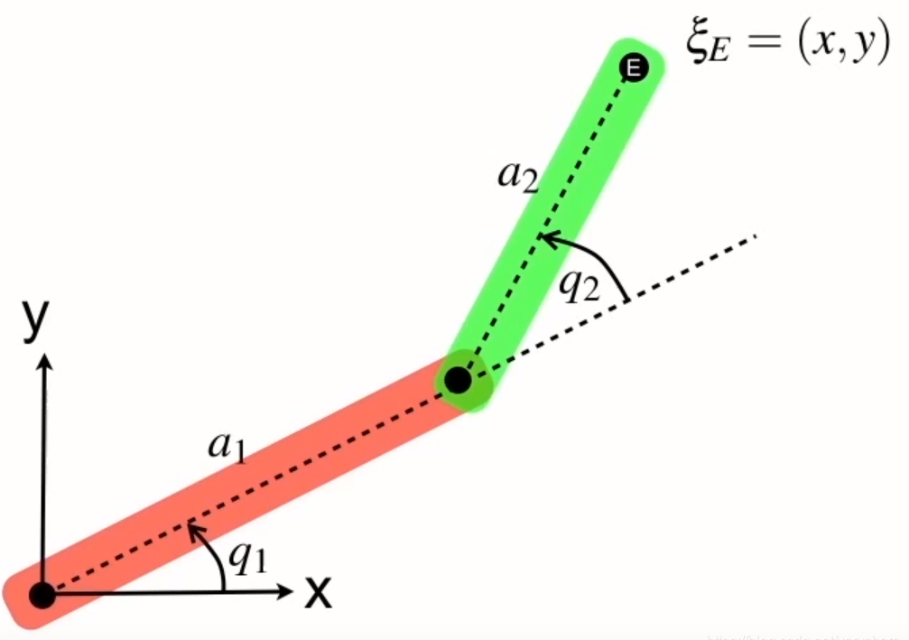  
  

#### 总结：两个关节角的求解公式
除非两杆共线，否则有双解

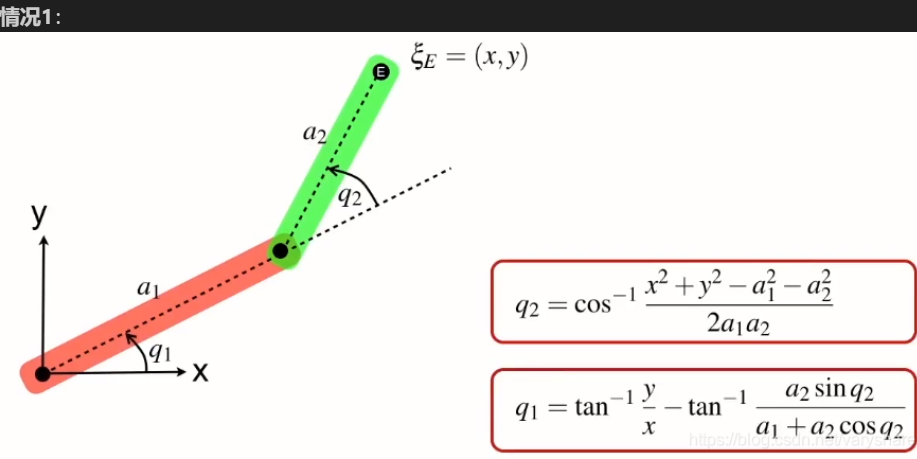  
情况2：
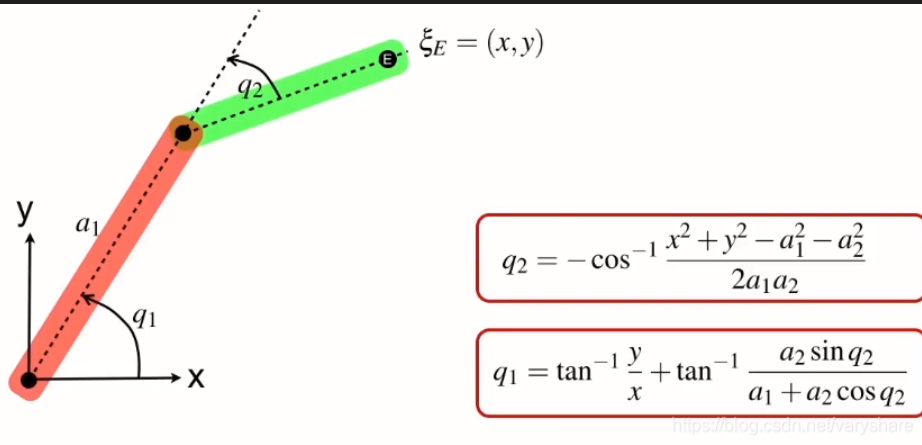

### 模拟实现一个二连杆机器人

In [7]:
import numpy as np
from numpy import cos, sin, arccos, arctan2
import matplotlib.pyplot as plt
import cv2

In [8]:
class TwoLinkArm:
    def __init__(self, _joint_angles=[0,0]):
         # 第0个关节是基座所以坐标固定是原点(0,0)
        self.joint0 = np.array([0,0])
        self.link_lengths = [1, 1]  # 两个关节的连杆长度
        self.update_joints(_joint_angles)
        self.forward_kinematics()

    def update_joints(self, _joint_angles):
        self.joint_angles = _joint_angles

    def forward_kinematics(self):
        """
        根据各个关节角计算各个关节的位置.
        注意：所使用的变量与模拟实体对应关系如下所示：
        (joint0)——连杆0——(joint1)——连杆1——[joint2]
        """
        # q0,q1分别是第0和第1个关节的关节角
        q0, q1 = self.joint_angles
        a0, a1 = self.link_lengths
        # 计算关节1的位置
        self.joint1 = self.joint0 + [a0*cos(q0), a0*sin(q0)]
        # 计算关节2的位置
        self.joint2 = self.joint1 + [a1*cos(q0+q1), a1*sin(q0+q1)]

    def plot(self):
        """
        绘制当前状态下的机械臂
        """
        # 清理坐标系中的内容
        plt.cla()
        x = [self.joint0[0], self.joint1[0], self.joint2[0]]
        y = [self.joint0[1], self.joint1[1], self.joint2[1]]
        # 绘制这样的一条线——连杆0————连杆1——
        plt.plot(x, y, c='red', zorder=1)
        # 绘制三个黑圆点代表关节,zorder=2是为了让绘制的点盖在直线上面
        plt.scatter(x,y,c='black', zorder=2)
        # 绘制目标点
        global target_x,target_y
        plt.scatter(target_x, target_y, c='blue', marker='*')

        # 固定住坐标系，
        # 不让它乱变，不让我点击的坐标和它显示的坐标不是一个坐标
        plt.xlim(-2, 2)
        plt.ylim(-2, 2)
        plt.show()

    def inverse_kinematic(self, x, y):
        """
        逆运动学求解要达到(x,y)需要转动的角度，
        返回机器人各关节需要转动的角度
        """
        a0 = self.link_lengths[0]
        a1 = self.link_lengths[1]
        q1 = arccos((x ** 2 + y ** 2 - a0 ** 2 - a1 ** 2) / (2 * a0 * a1))
        q0 = arctan2(y, x) - arctan2(a1 * sin(q1), a1 * cos(q1) + a0)
        return [q0, q1]
    
    def animation(self,x,y):
        _joint_angles = self.inverse_kinematic(x, y)

        # 将这个角度变化过程分解成一个1s内的执行15步的慢动作
        duration_time_seconds = 1
        actions_num = 15
        angles_per_action = (np.array(_joint_angles) - np.array(self.joint_angles))/actions_num
        plt.ion() # 开启交互模式不然没有动画效果
        for action_i in range(actions_num):
            
            self.joint_angles = np.array(self.joint_angles) + angles_per_action
            self.update_joints(self.joint_angles)
            self.plot()
            dt = duration_time_seconds/actions_num
            plt.pause(dt)

    def to_mouse_posi(self, event):
        """
        鼠标点击事件处理函数：记录鼠标在坐标系中的位置(x,y)
        然后将其设置为机器人要到达的目标点
        """
        global target_x, target_y
        if event.xdata == None or event.ydata == None:
            print("请在坐标系内选择一个点")
            return
        target_x = event.xdata
        target_y = event.ydata
        self.animation(target_x,target_y)

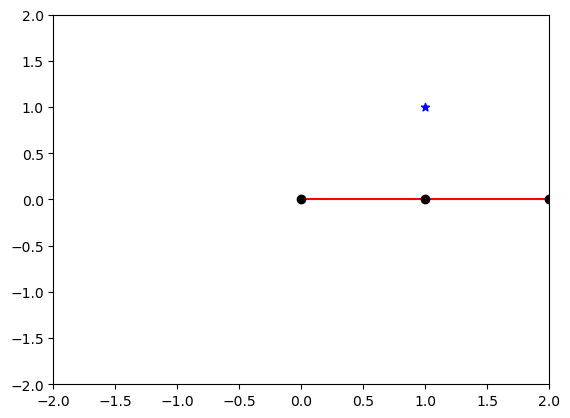

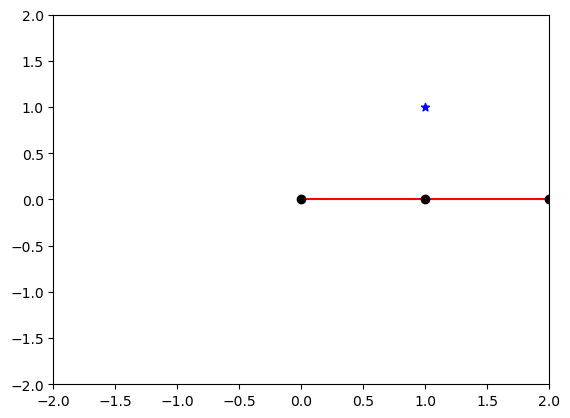

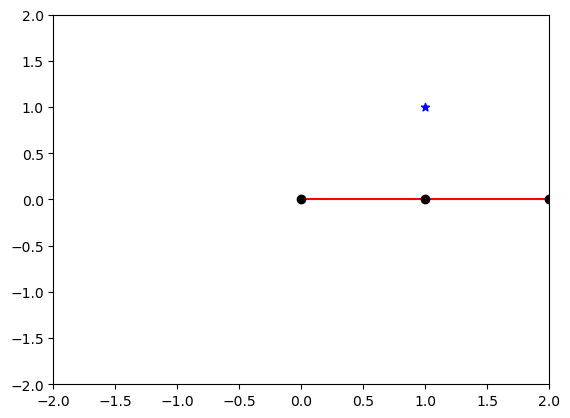

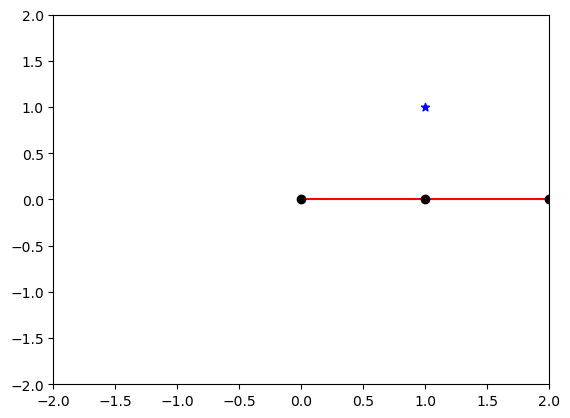

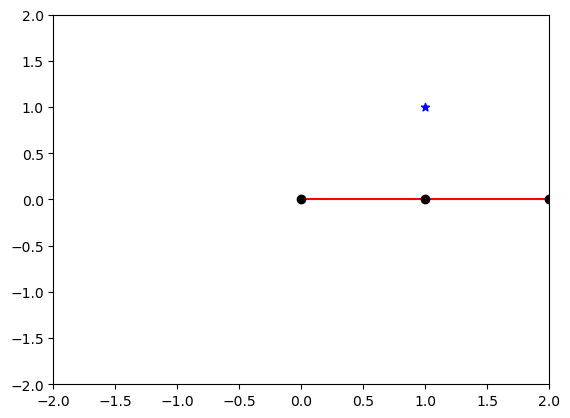

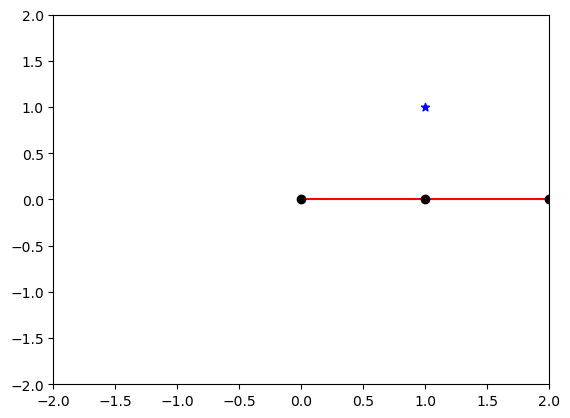

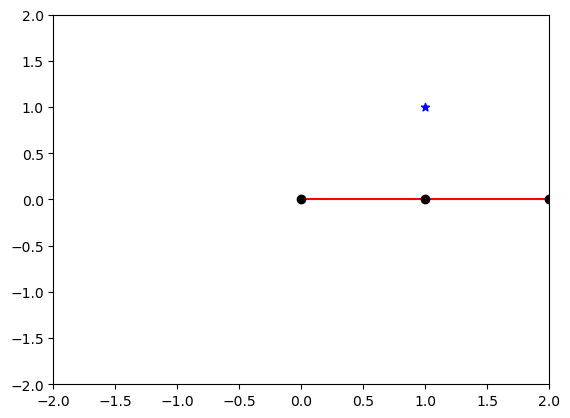

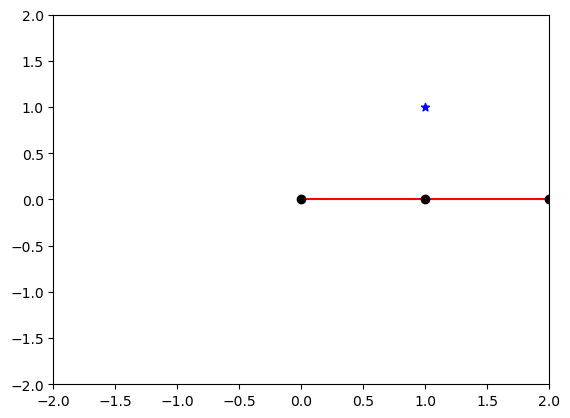

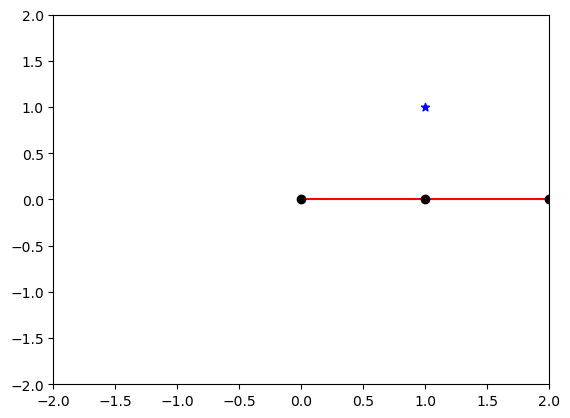

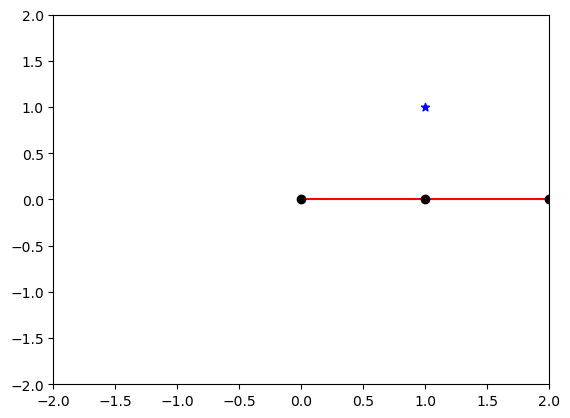

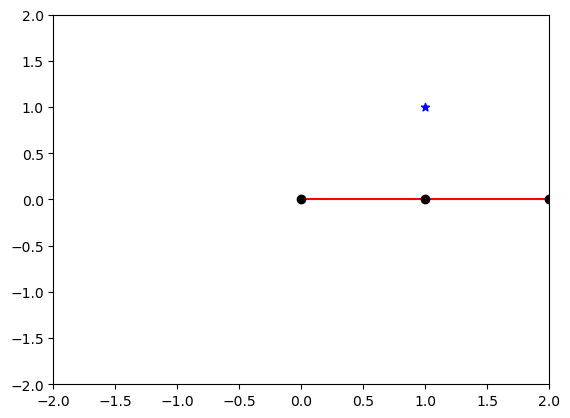

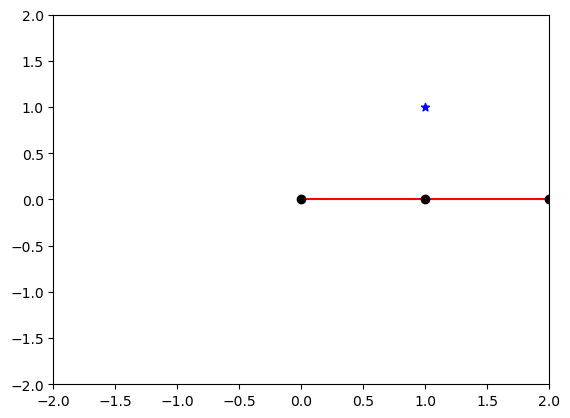

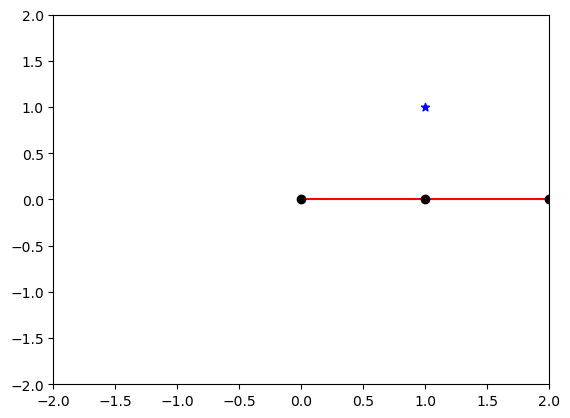

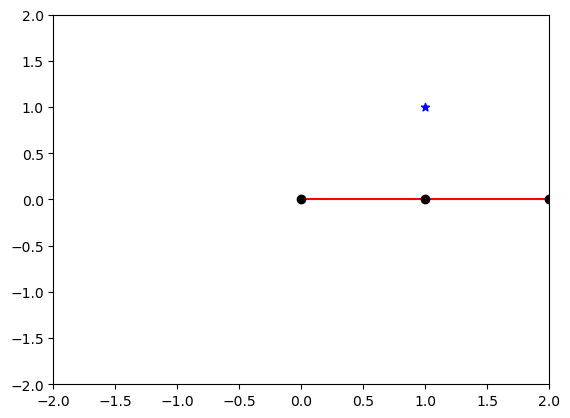

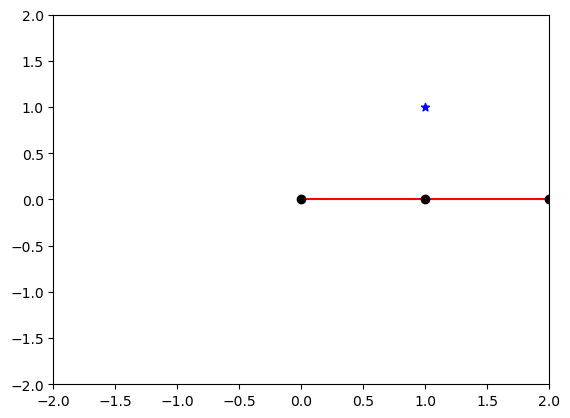

AttributeError: module 'cv2' has no attribute 'show'

In [ ]:
(target_x,target_y) = (1,1) # 机器人要到达的目标点
fig = plt.figure()
arm_robot = TwoLinkArm()
arm_robot.animation(target_x, target_y)
fig.canvas.mpl_connect("button_press_event", arm_robot.to_mouse_posi)
plt.ioff() # 一定要在plt.show()之前终止交互模式不然会一闪而过
plt.show()